## Some Common Imports


In [1]:
import os
import cv2
import yaml
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from  ultralytics import YOLO

import plots
import show_image as s
import create_dataframe as creator
import train_evaluate_model as model
import index_to_class as  decoder

torch.cuda.empty_cache()

## GPU details

In [2]:
# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# Get number of CPU cores
num_cpu_cores = os.cpu_count()
print(f"Number of CPU cores: {num_cpu_cores}")

# Get GPU name
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU name: {gpu_name}")
else:
    print("No GPU available")

Device: cuda
Number of CPU cores: 12
GPU name: NVIDIA A100-SXM4-80GB


## Extract the planets name from yaml file 

In [3]:
# Set the path to the YAML file
yaml_file_path = './dataset/data.yaml'

# Load the YAML file
with open(yaml_file_path, 'r') as yaml_file:
    yaml_data = yaml.load(yaml_file, Loader=yaml.FullLoader)

# Extract the values
first_key = next(iter(yaml_data))
first_value = yaml_data[first_key]

# Set the path to the output text file
output_file_path = './dataset/planets_name.txt'

# Write the values to the text file
with open(output_file_path, 'w') as output_file:
    output_file.write(str(first_value) + '\n')
       

print("Values saved to output.txt")

Values saved to output.txt


## Setup Configurations

In [4]:
# train dataset path
TRAIN_PATH = './dataset/train/'
# train  Dataframe path
TRAIN_DF_PATH = './dataframe/train_df.csv'

# valid dataset path
VALID_PATH = './dataset/valid/'
# vlaid Dataframe path
VALID_DF_PATH = './dataframe/valid_df.csv'

# test dataset path
TEST_PATH = './dataset/test/'
# test Dataframe path
TEST_DF_PATH = './dataframe/test_df.csv'



# load model
MODEL = YOLO('yolov8l.pt')

# yaml file path
CONFIG_PATH = './dataset/data.yaml'

# set epochs
EPOCHS = 30

# set image size
IMAGE_SIZE = 640

# set batch size
# BATCH_SIZE = 64

## Create dataframe that contais image, label pathes and class name. 

In [5]:
# creator.create(TRAIN_PATH)

# creator.create(TEST_PATH)

# creator.create(VALID_PATH)

## Explore the dataset

In [6]:
# 1. Read the CSV file
train_df = pd.read_csv(TRAIN_DF_PATH)
test_df = pd.read_csv(TEST_DF_PATH)
val_df = pd.read_csv(VALID_DF_PATH)

In [7]:
# 2. Display the first rows of the Dataframes
train_df.head()

,Image Path,Label Path,Class Name
0,./dataset/train/images/Venus-55-_jpg.rf.c54c01...,./dataset/train/labels/Venus-55-_jpg.rf.c54c01...,Venus
1,./dataset/train/images/Jupiter-130-_jpg.rf.681...,./dataset/train/labels/Jupiter-130-_jpg.rf.681...,Jupiter
2,./dataset/train/images/Saturn-145-_jpg.rf.4878...,./dataset/train/labels/Saturn-145-_jpg.rf.4878...,Saturn
3,./dataset/train/images/Uranus-15-_jpg.rf.a7b0d...,./dataset/train/labels/Uranus-15-_jpg.rf.a7b0d...,Uranus
4,./dataset/train/images/Neptune-69-_jpg.rf.0ab3...,./dataset/train/labels/Neptune-69-_jpg.rf.0ab3...,Neptune


In [8]:
val_df.head()

,Image Path,Label Path,Class Name
0,./dataset/valid/images/Neptune-4-_jpg.rf.52c06...,./dataset/valid/labels/Neptune-4-_jpg.rf.52c06...,Neptune
1,./dataset/valid/images/Mercury-116-_jpg.rf.af1...,./dataset/valid/labels/Mercury-116-_jpg.rf.af1...,Mercury
2,./dataset/valid/images/Neptune-138-_jpg.rf.917...,./dataset/valid/labels/Neptune-138-_jpg.rf.917...,Neptune
3,./dataset/valid/images/Neptune-86-_jpg.rf.5ce3...,./dataset/valid/labels/Neptune-86-_jpg.rf.5ce3...,Neptune
4,./dataset/valid/images/Mercury-131-_jpg.rf.37c...,./dataset/valid/labels/Mercury-131-_jpg.rf.37c...,Mercury


In [9]:
test_df.head()

,Image Path,Label Path,Class Name
0,./dataset/test/images/Mars-119-_jpg.rf.3974410...,./dataset/test/labels/Mars-119-_jpg.rf.3974410...,Mars
1,./dataset/test/images/Jupiter-31-_jpg.rf.7e426...,./dataset/test/labels/Jupiter-31-_jpg.rf.7e426...,Jupiter
2,./dataset/test/images/Earth-79-_jpg.rf.bf2acc4...,./dataset/test/labels/Earth-79-_jpg.rf.bf2acc4...,Earth
3,./dataset/test/images/Mercury-71-_jpg.rf.6c7cf...,./dataset/test/labels/Mercury-71-_jpg.rf.6c7cf...,Mercury
4,./dataset/test/images/Venus-96-_jpg.rf.4210f3d...,./dataset/test/labels/Venus-96-_jpg.rf.4210f3d...,Venus


In [10]:
# 3. show the shape of dataframes
print(f"len of the train images: {len(train_df)}")
print(f"len of the val images: {len(val_df)}")
print(f"len of the test images: {len(test_df)}")


len of the train images: 2497
len of the val images: 232
len of the test images: 128


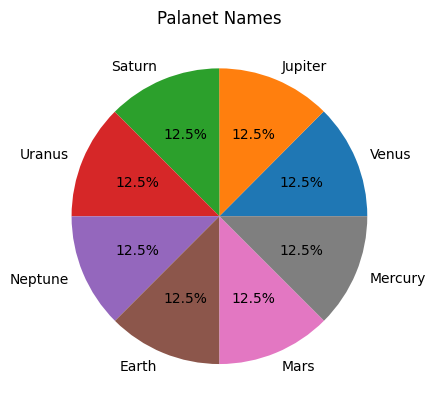

In [11]:
# 3. show class distributation 
plots.show_class_distributaion(train_df)

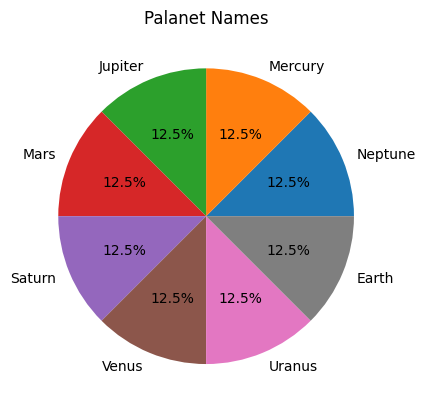

In [12]:
#valid 
plots.show_class_distributaion(val_df)

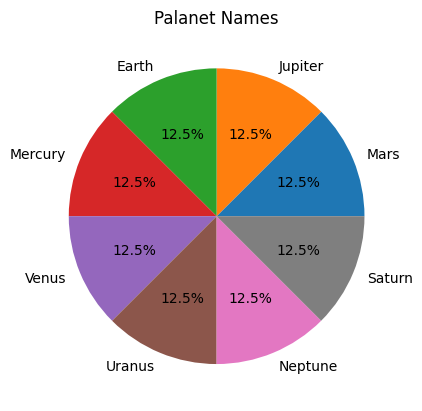

In [13]:
# test
plots.show_class_distributaion(test_df)

In [14]:
train_df['Class Name'].value_counts()

Earth      313
Venus      312
Jupiter    312
Saturn     312
Uranus     312
Neptune    312
Mars       312
Mercury    312
Name: Class Name, dtype: int64

In [15]:
test_df['Class Name'].value_counts()

Mars       16
Jupiter    16
Earth      16
Mercury    16
Venus      16
Uranus     16
Neptune    16
Saturn     16
Name: Class Name, dtype: int64

In [16]:
val_df['Class Name'].value_counts()

Neptune    29
Mercury    29
Jupiter    29
Mars       29
Saturn     29
Venus      29
Uranus     29
Earth      29
Name: Class Name, dtype: int64

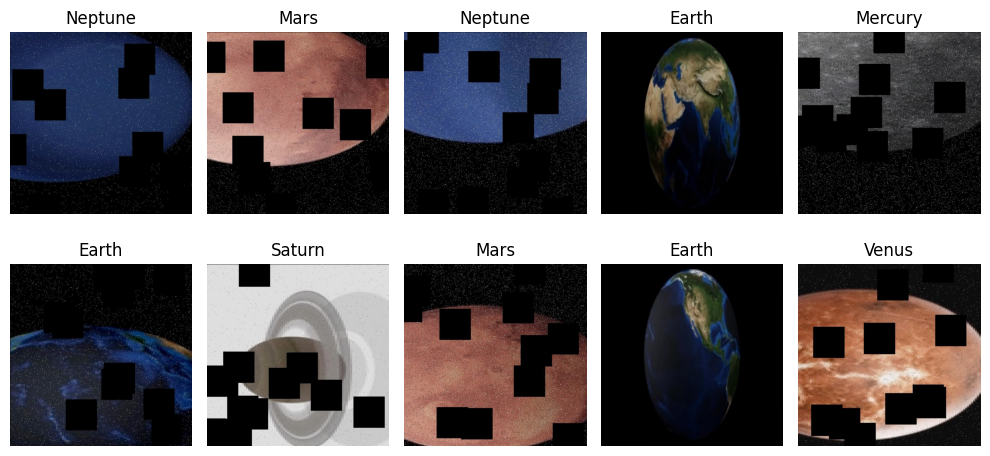

In [17]:
# 4. plot some images

# trian
s.show_images(train_df,num_images=10,num_rows=2,num_cols=5)

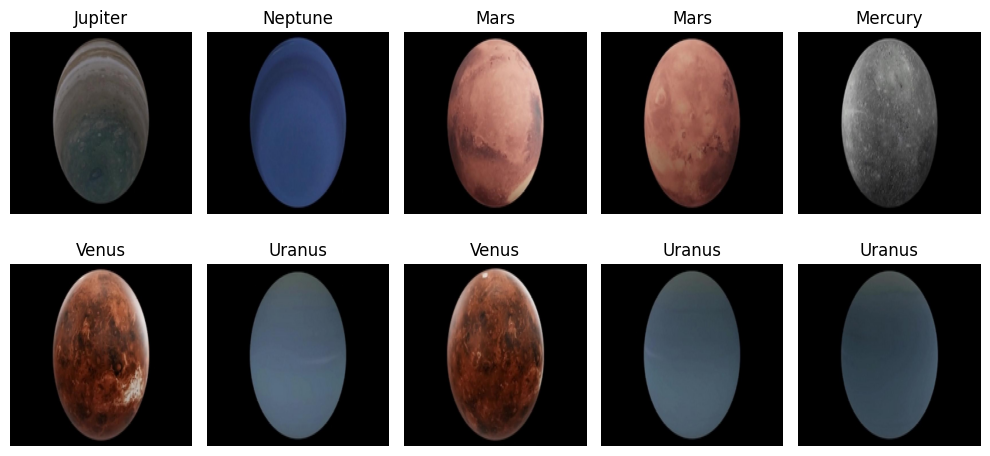

In [18]:
# test
s.show_images(test_df,num_images=10,num_rows=2,num_cols=5)

## Train model

In [19]:
model.train_model(MODEL,CONFIG_PATH,EPOCHS,IMAGE_SIZE)

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA A100-SXM4-80GB, 81070MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=./dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /notebooks/Wildlife-Object-Detection/dataset/train/labels.cache... 2496 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2496/2496 [00:00<?, ?it/s]
val: Scanning /notebooks/Wildlife-Object-Detection/dataset/valid/labels.cache... 232 images, 0 backgrounds, 0 corrupt: 100%|██████████| 232/232 [00:00<?, ?it/s]
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.48G     0.4723      1.324       1.14         45        640: 100%|██████████| 156/156 [00:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]
                   all        232        232      0.802      0.603      0.732      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/30      9.92G     0.5119     0.8399       1.14         43        640: 100%|██████████| 156/156 [00:23<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]
                   all        232        232      0.911      0.844      0.922      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/30      9.93G     0.4992     0.7074      1.126         34        640: 100%|██████████| 156/156 [00:22<00:00,  6.85it/s]
     

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f4bf43580d0>
fitness: 0.9919952085247519
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.99207,       0.995,       0.995,       0.995,     0.99147,     0.97621,       0.995,       0.995])
names: {0: 'Earth', 1: 'Jupiter', 2: 'Mars', 3: 'Mercury', 4: 'Neptune', 5: 'Saturn', 6: 'Uranus', 7: 'Venus'}
plot: True
results_dict: {'metrics/precision(B)': 0.9922406340979874, 'metrics/recall(B)': 0.9958333333333333, 'metrics/mAP50(B)': 0.9933519269776876, 'metrics/mAP50-95(B)': 0.9918444620299811, 'fitness': 0.9919952085247519}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.9109007901158827, 'inference': 7.548145179090829, 'loss': 0.0008159670336493131, 'postprocess': 1.00831